<a href="https://colab.research.google.com/github/jcmachicao/modpred/blob/master/arbol_decisiones_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly.express

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import plotly_express as px

In [29]:
#data100 = pd.read_excel('bd_manzanas.xlsx')
data100 = pd.read_excel('ai_salud_ML_002.xlsx')
data100.head()

,id,fiebre,tos,edad,aseo,sexo,patologia
0,1.0,Si,No,13.0,4.0,F,Negativa
1,2.0,No,No,8.0,5.0,F,Negativa
2,3.0,Si,Si,12.0,2.0,F,Positiva
3,4.0,No,No,14.0,3.0,M,Negativa
4,5.0,Si,Si,14.0,5.0,F,Positiva


In [50]:
data100.shape

(30, 7)

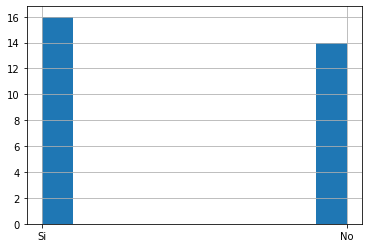

In [31]:
data100.fiebre.hist()

In [32]:
data100.patologia.value_counts()

Negativa    18
Positiva    12
Name: patologia, dtype: int64

In [34]:
data100.sexo.unique()

array(['F', 'M'], dtype=object)

In [35]:
data200 = pd.get_dummies(data100, drop_first=True)
data200.head()

,id,edad,aseo,fiebre_Si,tos_Si,sexo_M,patologia_Positiva
0,1.0,13.0,4.0,1,0,0,0
1,2.0,8.0,5.0,0,0,0,0
2,3.0,12.0,2.0,1,1,0,1
3,4.0,14.0,3.0,0,0,1,0
4,5.0,14.0,5.0,1,1,0,1


In [37]:
X = data200.drop(['patologia_Positiva'], axis=1) # predictores
y = data200.patologia_Positiva # variable predicha
X.shape, y.shape

((30, 6), (30,))

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

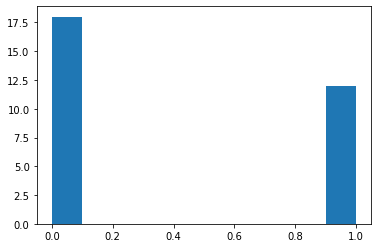

In [38]:
plt.hist(y)

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [40]:
model = DecisionTreeClassifier(max_depth=3)

In [41]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [43]:
data200['prediccion'] = model.predict(X)
data200['coincide'] = data200.patologia_Positiva == data200.prediccion

In [44]:
data200.head()

,id,edad,aseo,fiebre_Si,tos_Si,sexo_M,patologia_Positiva,prediccion,coincide
0,1.0,13.0,4.0,1,0,0,0,0,True
1,2.0,8.0,5.0,0,0,0,0,0,True
2,3.0,12.0,2.0,1,1,0,1,1,True
3,4.0,14.0,3.0,0,0,1,0,0,True
4,5.0,14.0,5.0,1,1,0,1,1,True


In [45]:
data200.coincide.sum()/len(data200)

0.9

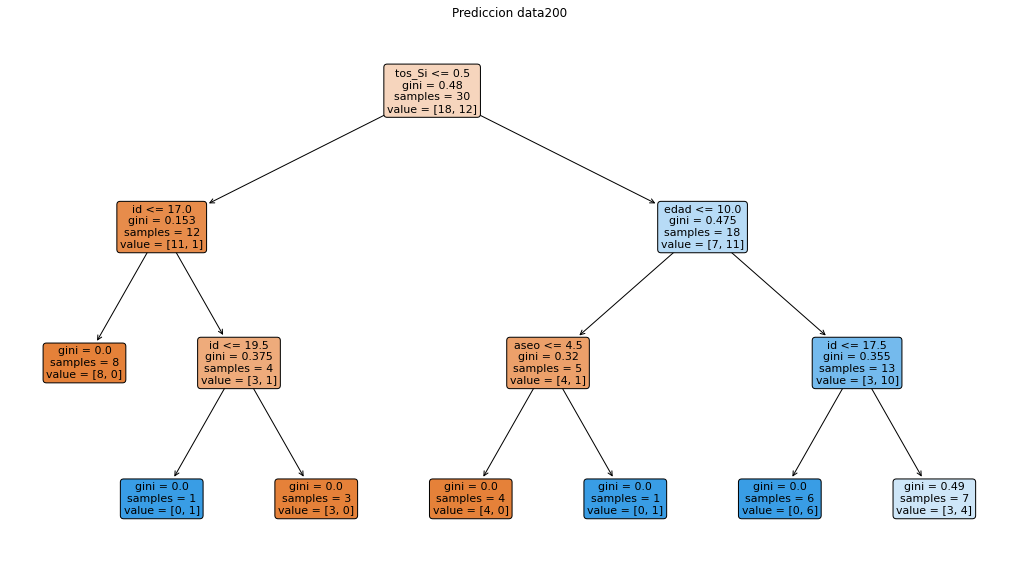

In [47]:
plt.figure(figsize=(18,10))
plot_tree(model, max_depth=3, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.title('Prediccion data200')
plt.show()

In [48]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


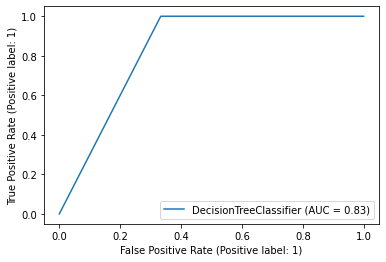

In [51]:
# Uso de Matriz de Confusion y Curva ROC
ax1 = plot_roc_curve(model, X[20:25], y[20:25])
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


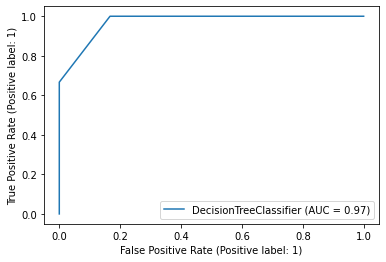

In [52]:
# Uso de Matriz de Confusion y Curva ROC
ax1 = plot_roc_curve(model, X, y)
plt.show()